In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from re import sub
import matplotlib.pyplot as plt
import bs4


In [6]:
temp = pd.read_html("https://questionnaire-148920.appspot.com/swe/data.html",flavor='html5lib')
print(*temp)

                  Player       Salary  Year Level
0            Abreu, Jose  $11,666,667  2016   MLB
1        Acevedo, Andury          NaN  2016   MLB
2         Ackley, Dustin   $3,200,000  2016   MLB
3      Adames, Cristhian     $507,500  2016   MLB
4          Adams, Austin     $507,500  2016   MLB
...                  ...          ...   ...   ...
1203     Zimmerman, Ryan  $14,000,000  2016   MLB
1204  Zimmermann, Jordan  $18,000,000  2016   MLB
1205        Zobrist, Ben  $10,500,000  2016   MLB
1206        Zunino, Mike     $507,500  2016   MLB
1207          Zych, Tony     $507,500  2016   MLB

[1208 rows x 4 columns]


In [7]:
df = pd.DataFrame(*temp, columns = ["Player" , 'Salary', "Year", "Level"])
#prelace nulls with zero
df = df.fillna(0)
df

,Player,Salary,Year,Level
0,"Abreu, Jose","$11,666,667",2016,MLB
1,"Acevedo, Andury",0,2016,MLB
2,"Ackley, Dustin","$3,200,000",2016,MLB
3,"Adames, Cristhian","$507,500",2016,MLB
4,"Adams, Austin","$507,500",2016,MLB
...,...,...,...,...
1203,"Zimmerman, Ryan","$14,000,000",2016,MLB
1204,"Zimmermann, Jordan","$18,000,000",2016,MLB
1205,"Zobrist, Ben","$10,500,000",2016,MLB
1206,"Zunino, Mike","$507,500",2016,MLB


In [8]:
# filter out anything that isnt a digit in salary, zeros are fine because we will only 
# be considereing the top 150 salries
i = 0
for sal in df["Salary"]:
    #convert everytyhing to string to remove non digit values
    sal = str(sal)
    sal = sub(r'[^\d.]', '', sal)
    #if the input was only text, it is now empyt change it to 0.
    if (sal == ""):
        sal = "0";
    sal = int(sal)
    #add new value to dataframe
    df.at[i , "Salary"] = sal
    i = i + 1
    #print(type(sal))

In [9]:
df

,Player,Salary,Year,Level
0,"Abreu, Jose",11666667,2016,MLB
1,"Acevedo, Andury",0,2016,MLB
2,"Ackley, Dustin",3200000,2016,MLB
3,"Adames, Cristhian",507500,2016,MLB
4,"Adams, Austin",507500,2016,MLB
...,...,...,...,...
1203,"Zimmerman, Ryan",14000000,2016,MLB
1204,"Zimmermann, Jordan",18000000,2016,MLB
1205,"Zobrist, Ben",10500000,2016,MLB
1206,"Zunino, Mike",507500,2016,MLB


In [10]:
sort = df.sort_values(by = "Salary", ascending=False, ignore_index=True)
sort

,Player,Salary,Year,Level
0,"Kershaw, Clayton",34571429,2016,MLB
1,"Greinke, Zack",34000000,2016,MLB
2,"Price, David",30000000,2016,MLB
3,"Hamilton, Josh",28410000,2016,MLB
4,"Verlander, Justin",28000000,2016,MLB
...,...,...,...,...
1203,"Tuivailala, Sam",0,2016,MLB
1204,"Mejia, Jenrry",0,2016,MLB
1205,"Gilmartin, Sean",0,2016,MLB
1206,"Gimenez, Chris",0,2016,MLB


In [11]:
top = sort.head(150)

In [12]:
top

,Player,Salary,Year,Level
0,"Kershaw, Clayton",34571429,2016,MLB
1,"Greinke, Zack",34000000,2016,MLB
2,"Price, David",30000000,2016,MLB
3,"Hamilton, Josh",28410000,2016,MLB
4,"Verlander, Justin",28000000,2016,MLB
...,...,...,...,...
145,"Morse, Michael",8500000,2016,MLB
146,"Vargas, Jason",8500000,2016,MLB
147,"Ruiz, Carlos",8500000,2016,MLB
148,"Santana, Carlos",8450000,2016,MLB


In [19]:
offer = top["Salary"].mean()
offer

15305421.046666667

In [20]:
def getOffer():
    stroffer = "${:,.2f}".format(offer)
    return stroffer

In [21]:
getOffer()

'$15,305,421.05'

In [49]:
def makeplot():
    plt.plot(top["Salary"])
    plt.title("The Value of the Qualifying Offer is " + getOffer())
    plt.ylabel("Salaries x 10^7")
    plt.axhline(y=offer, xmin=-1, xmax=1, color='r', linestyle='--')
    txt="The red line represents the values of the Qualifying Offer compared to the top 150 paid players."
    plt.figtext(0.5, 0.001, txt, wrap=True, horizontalalignment='center', fontsize=12)
    plt.savefig("QualifyingOffer_Traynor.png", dpi = 200, bbox_inches = "tight")
    plt.show()

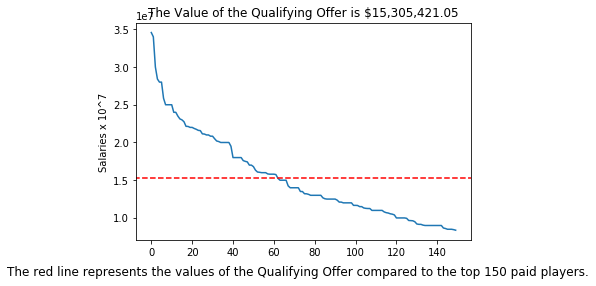

In [51]:
makeplot()

AttributeError: 'AxesSubplot' object has no attribute 'show'